# Genomic Regulation

## Get chr16 CTCF segments

Get the *chr16* segments which share the same state between both monocyte replicates.

### Test files

In [84]:
%%bash
# Obtain files for test
cd RESULTS/Modelo_11_estados
cat Monocyte1_11_Master_11_segments.bed | grep 'chr16' | grep 'E9' | sort -k 2,3 -h | head -n 20 > monocyte1_segments.bed
cat Monocyte2_11_Master_11_segments.bed | grep 'chr16' | grep 'E9' | sort -k 2,3 -h | head -n 20 > monocyte2_segments.bed
echo "Monocyte 1 segments.bed"
cat monocyte1_segments.bed
wc -l monocyte1_segments.bed
echo "Monocyte 2 segments.bed"
cat monocyte2_segments.bed
wc -l monocyte2_segments.bed

Monocyte 1 segments.bed
chr16	60400	61400	E9
chr16	72600	72800	E9
chr16	115200	116000	E9
chr16	146400	147400	E9
chr16	156600	157600	E9
chr16	167800	168200	E9
chr16	232200	232400	E9
chr16	412000	412600	E9
chr16	441800	442200	E9
chr16	486400	486800	E9
chr16	537600	538000	E9
chr16	597000	597600	E9
chr16	629000	629400	E9
chr16	661000	661600	E9
chr16	710800	711200	E9
chr16	711600	711800	E9
chr16	736200	736400	E9
chr16	761200	763200	E9
chr16	835400	836200	E9
chr16	1019400	1019600	E9
      20 monocyte1_segments.bed
Monocyte 2 segments.bed
chr16	60400	61400	E9
chr16	72400	72800	E9
chr16	115000	116400	E9
chr16	146600	147400	E9
chr16	155400	158200	E9
chr16	167800	168800	E9
chr16	231800	232200	E9
chr16	309000	309200	E9
chr16	353600	354200	E9
chr16	402200	403200	E9
chr16	412000	412800	E9
chr16	441800	442200	E9
chr16	508200	508400	E9
chr16	537400	538200	E9
chr16	596600	597400	E9
chr16	627800	630600	E9
chr16	660800	661800	E9
chr16	710800	711800	E9
chr16	717400	718200	E9
chr16	735800	736800	E9
      

In [270]:
%%writefile files/test_tracks/bed1.bed
chr16	60400	61400	E9
chr16	72600	72800	E9
chr16	115200	116000	E9
chr16	146400	147400	E9
chr16	156600	157600	E9
chr16	167800	168200	E9
chr16	232200	232400	E9
chr16	412000	412600	E9
chr16	441800	442200	E9
chr16	486400	486800	E9
chr16	537600	538000	E9
chr16	597000	597600	E9
chr16	629000	629400	E9
chr16	661000	661600	E9
chr16	710800	711200	E9
chr16	711600	711800	E9
chr16	736200	736400	E9
chr16	761200	763200	E9
chr16	835400	836200	E9
chr16	1019400	1019600	E9

Writing files/test_tracks/bed1.bed


In [272]:
%%writefile files/test_tracks/bed2.bed
chr16	60400	61400	E9
chr16	72400	72800	E9
chr16	115000	116400	E9
chr16	146600	147400	E9
chr16	146610	147400	E8
chr16	155400	158200	E9
chr16	167800	168800	E9
chr16	231800	232200	E9
chr16	309000	309200	E9
chr16	353600	354200	E9
chr16	402200	403200	E9
chr16	412000	412800	E9
chr16	441800	442200	E9
chr16	508200	508400	E9
chr16	537400	538200	E9
chr16	596600	597400	E9
chr16	596700	597400	E8
chr16	596700	597400	E8
chr16	627800	630600	E9
chr16	660800	661800	E9
chr16	710800	711800	E9
chr16	717400	718200	E9
chr16	735800	736800	E9

Writing files/test_tracks/bed2.bed


In [271]:
%%writefile files/test_tracks/dnase1.peaks.bed
chr1	770942	771278	chr1.9	584	.	0.039	1.79	-1	151
chr1	771678	771933	chr1.10	568	.	0.0343	1.56	-1	121
chr1	773279	773398	chr1.11	555	.	0.0303	1.38	-1	49
chr1	777497	777598	chr1.12	553	.	0.0299	1.36	-1	46
chr1	794051	794336	chr1.13	569	.	0.0344	1.57	-1	152
chr1	800514	800667	chr1.14	549	.	0.0287	 1.3	-1	34
chr1	805004	805656	chr1.15	1000	.	0.3561	16	-1	286
chr16	63392	63462	chr16.1	551	.	0.0292	1.33	-1	26
chr16	65192	65500	chr16.2	650	.	0.0582	2.69	-1	140
chr16	65680	65848	chr16.3	578	.	0.0371	 1.7	-1	81
chr16	66552	66704	chr16.4	565	.	0.0334	1.52	-1	71
chr16	69567	69918	chr16.5	593	.	0.0416	1.91	-1	156
chr16	72620	73427	chr16.6	1000	.	0.2652	12.5	-1	256
chr16	74047	74486	chr16.7	687	.	0.069	 3.2	-1	213
chr16	77159	77214	chr16.8	550	.	0.0289	1.31	-1	20
chr16	78558	80270	chr16.9	756	.	0.0889	4.15	-1	1188
chr16	80539	84109	chr16.10	797	.	0.101	4.72	-1	2835
chr16	84632	86116	chr16.11	1000	.	0.2262	10.7	-1	648
chr16	86223	86873	chr16.12	717	.	0.0777	3.62	-1	274
chr16	87530	87809	chr16.13	614	.	0.0475	2.19	-1	147
chr16	88254	89597	chr16.14	703	.	0.0736	3.42	-1	691
chr16	91933	92367	chr16.15	558	.	0.0312	1.42	-1	78
chr16	102933	104351	chr16.16	1000	.	0.521	16	-1	852
chr16	107650	109038	chr16.17	708	.	0.0751	3.49	-1	327
chr16	109773	109913	chr16.18	555	.	0.0305	1.39	-1	61
chr16	110337	110607	chr16.19	581	.	0.0381	1.74	-1	117
chr16	110941	114948	chr16.20	915	.	0.1354	6.36	-1	421
chr16	115448	116225	chr16.21	1000	.	0.3633	16	-1	419
chr16	116533	116836	chr16.22	568	.	0.0343	1.56	-1	131

Writing files/test_tracks/dnase1.peaks.bed


### Methods

In [317]:
import re as re

def head(path, filename, lines=20):
    """
    """
    i = 0
    file = open(path + "/" + filename, "r")
    for line in file:
        print(line.strip())
        i += 1
        if i > lines:
            break
    file.close()

def get_parts(bed_line, sep='\t'):
    """
    """
    bed_line_parts = bed_line.rstrip('\n').split(sep)
    return bed_line_parts[0], int(bed_line_parts[1]), int(bed_line_parts[2]), bed_line_parts[3]

def concat_parts(chrom, start, end, feature, sep='\t'):
    """
    """
    bed_line = chrom + '\t' + str(start) +  '\t' + str(end) + '\t' + feature + '\n'
    return bed_line

def bed_coverage(path, filename, sep='\t'):
    """
    Returns the acummulated length of all the segments of the bed file filename
    """
    i = 0
    file = open(path + "/" + filename, "r")
    coverage = 0 
    for line in file:
        _ , f1_segment_start, f1_segment_end, _ = get_parts(line)
        coverage += f1_segment_end + f1_segment_start
    file.close()
    return coverage

def bed_segment_count_by_re_feature(path, filename, re_feature, sep='\t'):
    """
    Returns the segment count by feature name of the bed file filename. 
    The feature is informed as a regexp
    """
    i = 0
    file = open(path + "/" + filename, "r")
    segment_count = 0 
    for line in file:
        _ , _, _, segment_feature = get_parts(line)
        if re.search(re_feature, segment_feature):
            segment_count += 1
    file.close()
    return segment_count

def intersect_bed(input_dir, input_file1, input_file2, output_dir, output_file, chrom="chr16", 
                  f1_feature_filter="E9", f2_feature_filter="E9", output_feature="E9", sep='\t',
                  drop_feature_threshold=20, output_mode="intersect"):  
    """
    If output node is intersect, returns the intersected bed segments
    If output mode is annotate, returns all the segments of input_file1 
    annotated if it's the case with the feature defined in input_file2.
    """
    f1_segments = open(input_dir + "/" + input_file1, "r")
    f2_segments = open(input_dir + "/" + input_file2, "r")
    output_segments = open(output_dir + "/" + output_file, "w")
    f1_segment = f1_segments.readline()
    f2_segment = f2_segments.readline()
    while(f1_segment != "" and f2_segment != ""):
        f1_chrom, f1_segment_start, f1_segment_end, f1_feature = get_parts(f1_segment)
        f2_chrom, f2_segment_start, f2_segment_end, f2_feature = get_parts(f2_segment)
        # Filter f1 and read f1
        if f1_chrom != chrom or (f1_feature_filter != "" and f1_feature != f1_feature_filter):
            f1_segment = f1_segments.readline()
        # Filter f2 and read f2
        elif f2_chrom != chrom or (f2_feature_filter != "" and f2_feature != f2_feature_filter):
            f2_segment = f2_segments.readline()
        # f2 segment downstream f1 segment
        elif f2_segment_start > f1_segment_end:
            if output_mode == "annotate" and drop_feature_threshold < f1_segment_end - f1_segment_start:
                output_segment = concat_parts(chrom, f1_segment_start, f1_segment_end, f1_feature)
                output_segments.write(output_segment)
            f1_segment = f1_segments.readline() 
        # f1 segment downstream f2 segment
        elif f1_segment_start > f2_segment_end:
            f2_segment = f2_segments.readline()
        else: # Overlap
            # Save intersect
            if output_mode == "intersect":
                output_start = max(f1_segment_start, f2_segment_start)
                output_end =  min(f2_segment_end, f1_segment_end)
                if drop_feature_threshold < output_end - output_start:
                    output_segment = concat_parts(chrom, output_start, output_end, output_feature)
                    output_segments.write(output_segment)
                # Advance f1
                if f2_segment_end >= f1_segment_end:
                    f1_segment = f1_segments.readline()
                # Advance f2
                elif f1_segment_end > f2_segment_end:
                    f2_segment = f2_segments.readline()
            # Annotate mode: save f1, advance f1, advance f2
            else: 
                feature = f1_feature + "+" + output_feature
                if drop_feature_threshold < f1_segment_end - f1_segment_start:
                    output_segment = concat_parts(chrom, f1_segment_start, f1_segment_end, feature)
                    output_segments.write(output_segment)
                f1_segment = f1_segments.readline()
                f2_segment = f2_segments.readline()
    while(output_mode == "annotate" and f1_segment != ""):
        output_segments.write(f1_segment)
        f1_segment = f1_segments.readline()
        
    f1_segments.close()
    f2_segments.close()
    output_segments.close()


### Tests

In [381]:
TEST_PATH = "files/test_tracks"
F1_FILE_TEST = "test1.bed"
F2_FILE_TEST = "test2.bed"
FILE_OUTPUT_TEST = "test_result.bed"
CHROM = "chr16"
SEP = '\t'
DROP = 0

failed = 0
passed = 0
launched = 0

def create_testfile(segments, test_path, test_file):
    """
    """
    output_segments = open(test_path + "/" + test_file, "w")
    for segment in segments:
        output_segment = concat_parts(segment[0], segment[1], segment[2], segment[3])
        output_segments.write(output_segment)
    output_segments.close()

def read_testfile(test_path, test_file):
    """
    """
    file_segments = open(test_path + "/" + test_file, "r")
    segments = []
    segment = file_segments.readline()
    while(segment != ""):
        chrom, segment_start, segment_end, feature = get_parts(segment)
        segments.append([chrom, str(segment_start), str(segment_end), feature])
        segment = file_segments.readline()
    file_segments.close()
    return segments

def do_test(test_number, segments_1, segments_2, test_expected_result, 
            verbose=True, mode="intersect", output_feature="output_feature",
            test_path=TEST_PATH, f1_file_test=F1_FILE_TEST, f2_file_test=F2_FILE_TEST,
            file_output_test=FILE_OUTPUT_TEST, 
            chrom=CHROM, f1_feature_filter="", f2_feature_filter="",
            drop_feature_threshold=DROP):
    global failed, passed, launched
    try:
        launched += 1
        create_testfile(segments_1, test_path, f1_file_test)
        create_testfile(segments_2, test_path, f2_file_test)
        intersect_bed(test_path, f1_file_test, f2_file_test, test_path, 
                        file_output_test, chrom=chrom, 
                        f1_feature_filter=f1_feature_filter, f2_feature_filter=f2_feature_filter, 
                        output_feature=output_feature, 
                        sep=SEP, drop_feature_threshold=drop_feature_threshold, output_mode=mode)
        if verbose: head(test_path, file_output_test, 20)
        output_segments = read_testfile(test_path, file_output_test)
        if verbose: print("Threshold", drop_feature_threshold)
        if verbose: print("Result", output_segments)
        if verbose: print("Expected result", test_expected_result)
        assert output_segments == test_expected_result, "Unexpected segments"
        passed += 1
    except AssertionError:
        print ("Failed test %s: Result:\n %s\nExpected result:\n %s\n"
               % (test_number, output_segments, test_expected_result))
        failed += 1
        exit(1)

# Test 1
segments_1 = [["chr16","0","100", "A"],
              ["chr16","200","210", "A"]]
segments_2 = [["chr16","10","50", "B"]]
test_expected_result = [["chr16","10","50", "output_feature"]]
do_test(1, segments_1, segments_2, test_expected_result, False)

# Test 2
test_expected_result = [["chr16","0","100", "A+output_feature"],
                        ["chr16","200","210", "A"]]
do_test(2, segments_1, segments_2, test_expected_result, False, "annotate")

# Test 3
segments_1 = [["chr16","0","100", "A"],
              ["chr16","200","210", "A"]]
segments_2 = [["chr16","10","20", "B"],
              ["chr16","30","50", "B"]]
test_expected_result = [["chr16","0","100", "A+output_feature"],
                        ["chr16","200","210", "A"]]
do_test(3, segments_1, segments_2, test_expected_result, False, "annotate")

# Test 4
segments_1 = [["chr16","0","100", "A"],
              ["chr16","200","210", "A"]]
segments_2 = [["chr16","10","20", "B"],
              ["chr16","30","50", "B"]]
test_expected_result = [["chr16","10","20", "output_feature"],
                        ["chr16","30","50", "output_feature"]]
do_test(4, segments_1, segments_2, test_expected_result, False, "intersect")

# Test 5
segments_1 = [["chr16","0","100", "A"],
              ["chr16","200","210", "A"]]
segments_2 = []
test_expected_result = []
do_test(5, segments_1, segments_2, test_expected_result, False, "intersect")

# Test 6
segments_1 = [["chr16","0","100", "A"],
              ["chr16","200","210", "A"]]
segments_2 = []
test_expected_result = segments_1
do_test(6, segments_1, segments_2, test_expected_result, False, "annotate")

# Test 7
segments_1 = []
segments_2 = []
test_expected_result = segments_1
do_test(7, segments_1, segments_2, test_expected_result, False, "annotate")

# Test 8
segments_1 = []
segments_2 = []
test_expected_result = segments_1
do_test(8, segments_1, segments_2, test_expected_result, False, "intersect")

# Test 9
segments_1 = [["chr8","0","100", "A"],
              ["chr8","100","150", "A"],
              ["chr16","200","210", "A"],
              ["chr16","300","1000", "A"]]
segments_2 = [["chr16","50","500", "B"],
              ["chr16","600","800", "B"]]
test_expected_result = [["chr16","200","210", "A+output_feature"],
                        ["chr16","300","1000", "A+output_feature"]]
do_test(9, segments_1, segments_2, test_expected_result, False, "annotate")

# Test 10
segments_1 = [["chr8","0","100", "A"],
              ["chr8","100","150", "A"],
              ["chr16","200","210", "A"],
              ["chr16","300","1000", "A"]]
segments_2 = [["chr16","50","500", "B"],
              ["chr16","600","800", "B"]]
test_expected_result = [["chr16","200","210", "output_feature"],
                        ["chr16","300","500", "output_feature"],
                        ["chr16","600","800", "output_feature"]]
do_test(10, segments_1, segments_2, test_expected_result, False, "intersect")

# Test 11
test_expected_result = [["chr16","300","500", "output_feature"],
                        ["chr16","600","800", "output_feature"]]
do_test(11, segments_1, segments_2, test_expected_result, True, "intersect", drop_feature_threshold=30)

print(" ")
if launched == passed: print("Passed All %s Test" %(passed))
else: print("ERROR: There are failed tests")

chr16	300	500	output_feature
chr16	600	800	output_feature
Threshold 30
Result [['chr16', '300', '500', 'output_feature'], ['chr16', '600', '800', 'output_feature']]
Expected result [['chr16', '300', '500', 'output_feature'], ['chr16', '600', '800', 'output_feature']]
 
Passed All 11 Test


### CTCF segments

In [406]:
PATH = "files/tracks"
M1_FILE = "Monocyte1_11_Master_11_segments.bed"
M2_FILE = "Monocyte2_11_Master_11_segments.bed"
CHROM = "chr16"
STATE = "E9"
intersect_bed(PATH, M1_FILE, M2_FILE, PATH, STATE + ".bed", chrom=CHROM, 
                  f1_feature_filter = STATE, f2_feature_filter = STATE, output_feature = STATE, sep=SEP,
                  drop_feature_threshold = 10)

head(PATH, STATE + ".bed", 10)
print("Output file:", STATE + ".bed")

chr16	60400	61400	E9
chr16	72600	72800	E9
chr16	115200	116000	E9
chr16	146600	147400	E9
chr16	156600	157600	E9
chr16	167800	168200	E9
chr16	412000	412600	E9
chr16	441800	442200	E9
chr16	537600	538000	E9
chr16	597000	597400	E9
chr16	629000	629400	E9
Output file: E9.bed


## Segment annotation
Annotate the segments. At a minimum, the percentage of segments that overlap with protein-coding genes in said chromosome should be given.

### Tracks to annotate
The tracks are obtained from https://genome.ucsc.edu/cgi-bin/hgTables

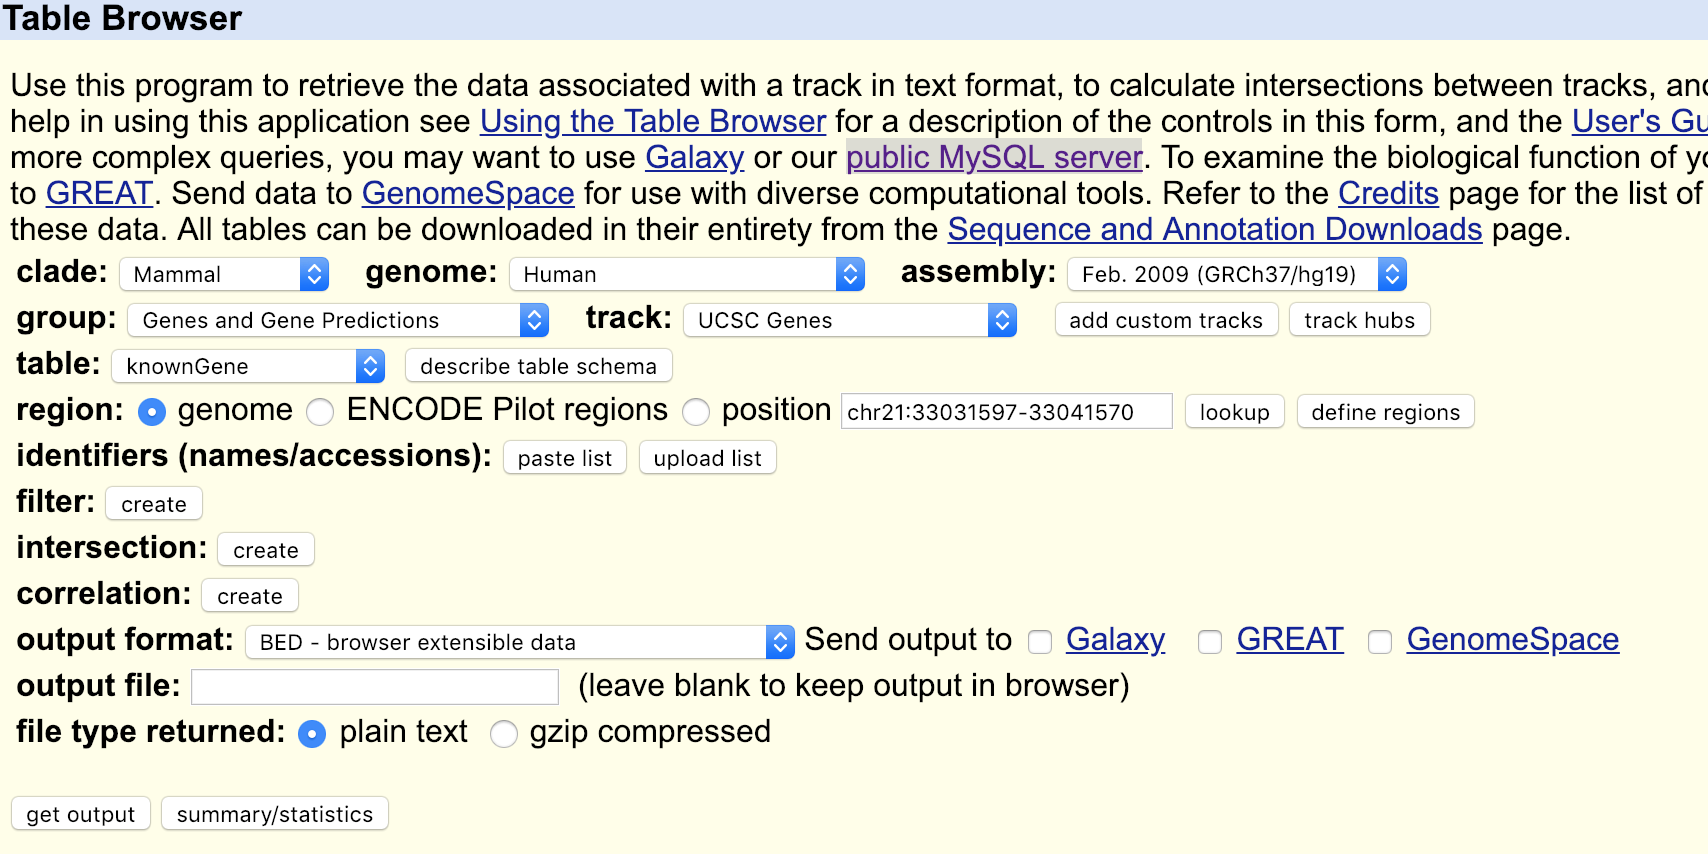

In [420]:
from IPython.display import Image
Image("table_browser.png")

### Annotate gene overlap

In [408]:
OUTPUT_FEATURE = "gene"
INPUT_FILE = STATE + ".bed"
OUTPUT_FILE = STATE + "_" + OUTPUT_FEATURE + ".bed"
ANNOTATION_TRACK = "hg19_genes.bed"
intersect_bed(PATH, INPUT_FILE, ANNOTATION_TRACK,
                  PATH, OUTPUT_FILE, chrom = CHROM, 
                  f1_feature_filter = "", f2_feature_filter="", 
                  output_feature = OUTPUT_FEATURE, sep=SEP,
                  drop_feature_threshold = 10, output_mode="annotate")
head(PATH, OUTPUT_FILE, 10)

overlap_segment_count = bed_segment_count_by_re_feature(PATH, OUTPUT_FILE, OUTPUT_FEATURE)
print("")
print("Count of state segments overlapped:", overlap_segment_count)
total_segment_count = bed_segment_count_by_re_feature(PATH, OUTPUT_FILE, "")
print("Count of all state segments", total_segment_count)
print("Percent overlapped state segments over total segments:", 
      overlap_segment_count * 100 / total_segment_count)
print("Output file:", OUTPUT_FILE)

chr16	60400	61400	E9
chr16	72600	72800	E9
chr16	115200	116000	E9+gene
chr16	146600	147400	E9+gene
chr16	156600	157600	E9+gene
chr16	167800	168200	E9+gene
chr16	412000	412600	E9
chr16	441800	442200	E9+gene
chr16	537600	538000	E9+gene
chr16	597000	597400	E9+gene
chr16	629000	629400	E9

Count of state segments overlapped: 167
Count of all state segments 468
Percent overlapped state segments over total segments: 35.68376068376068
Output file: E9_gene.bed


### Annotate exon overlap

In [409]:
OUTPUT_FEATURE = "exons"
INPUT_FILE = STATE + "_gene.bed"
OUTPUT_FILE = STATE + "_" + OUTPUT_FEATURE + "_gene.bed"
ANNOTATION_TRACK = "hg19_coding_exons.bed" 
intersect_bed(PATH, INPUT_FILE, ANNOTATION_TRACK, 
                  PATH, OUTPUT_FILE, chrom = CHROM, 
                  f1_feature_filter = "", f2_feature_filter="", 
                  output_feature = OUTPUT_FEATURE, sep=SEP,
                  drop_feature_threshold = 10, output_mode="annotate")
head(PATH, OUTPUT_FILE, 10)

overlap_segment_count = bed_segment_count_by_re_feature(PATH, OUTPUT_FILE, OUTPUT_FEATURE)
print("")
print("Count of state segments overlapped:", overlap_segment_count)
total_segment_count = bed_segment_count_by_re_feature(PATH, OUTPUT_FILE, "")
print("Count of all state segments", total_segment_count)
print("Percent overlapped state segments over total segments:", 
      overlap_segment_count * 100 / total_segment_count)
print("Output file:", OUTPUT_FILE)

chr16	60400	61400	E9
chr16	72600	72800	E9
chr16	115200	116000	E9+gene
chr16	146600	147400	E9+gene
chr16	156600	157600	E9+gene
chr16	167800	168200	E9+gene
chr16	412000	412600	E9
chr16	441800	442200	E9+gene
chr16	537600	538000	E9+gene
chr16	597000	597400	E9+gene+exons
chr16	629000	629400	E9

Count of state segments overlapped: 37
Count of all state segments 468
Percent overlapped state segments over total segments: 7.905982905982906
Output file: E9_exons_gene.bed


### Annotate upstream 200 overlap

In [410]:
OUTPUT_FEATURE = "up200"
INPUT_FILE = STATE + "_gene.bed"
OUTPUT_FILE = STATE + "_" + OUTPUT_FEATURE + "_exons_gene.bed"
ANNOTATION_TRACK = "hg19_up200.bed" 
intersect_bed(PATH, INPUT_FILE, ANNOTATION_TRACK, 
                  PATH, OUTPUT_FILE, chrom = CHROM, 
                  f1_feature_filter = "", f2_feature_filter="", 
                  output_feature = OUTPUT_FEATURE, sep=SEP,
                  drop_feature_threshold = 10, output_mode="annotate")
head(PATH, OUTPUT_FILE, 10)

overlap_segment_count = bed_segment_count_by_re_feature(PATH, OUTPUT_FILE, OUTPUT_FEATURE)
print("")
print("Count of state segments overlapped:", overlap_segment_count)
total_segment_count = bed_segment_count_by_re_feature(PATH, OUTPUT_FILE, "")
print("Count of all state segments", total_segment_count)
print("Percent overlapped state segments over total segments:", 
      overlap_segment_count * 100 / total_segment_count)
print("Output file:", OUTPUT_FILE)

chr16	60400	61400	E9+up200
chr16	72600	72800	E9+up200
chr16	115200	116000	E9+gene
chr16	146600	147400	E9+gene
chr16	156600	157600	E9+gene
chr16	167800	168200	E9+gene
chr16	412000	412600	E9
chr16	441800	442200	E9+gene
chr16	537600	538000	E9+gene
chr16	597000	597400	E9+gene
chr16	629000	629400	E9

Count of state segments overlapped: 18
Count of all state segments 468
Percent overlapped state segments over total segments: 3.8461538461538463
Output file: E9_up200_exons_gene.bed


## DNASE I overlap

Download the peaks of DNase I in monocytes of ENCODE for chr16 and calculate the percentage of overlap between DNaseI-peaks and your work segments. Use the file wgEncodeOpenChromDnaseMonocd14Pk.narrowPeak.gz in:
http://hgdownload.cse.ucsc.edu/goldenpath/hg19/encodeDCC/wgEncodeOpenChromDnase

### Tests

In [411]:
intersect_bed(TEST_PATH, STATE + "_segments_test.bed", "dnase1.peaks.bed", TEST_PATH, 
                  STATE + "_dnase1_overlap_test.bed",
                  chrom = CHROM, f1_feature_filter = STATE, f2_feature_filter = "", 
                  output_feature = STATE + "_dnase1_overlap", sep=SEP,
                  drop_feature_threshold=20)
head(TEST_PATH, STATE +"_dnase1_overlap_test.bed", 10)

### Overlap

#### Overlap by coverage

Overlap calculated as percent ratio between sum of base pair overlapped and sum of total base pair covered by all the E9 segments. This method doesn't have much sense because it depends of the arbitrary sensitivity of the dna base segments (200 bps in the case of chromatin states).

In [415]:
intersect_bed(PATH, STATE + ".bed", "wgEncodeOpenChromDnaseMonocd14Pk.narrowPeak.bed", 
                  PATH, STATE + "_dnase1.bed", chrom = CHROM, 
                  f1_feature_filter = "", f2_feature_filter = "", 
                  output_feature = STATE + "_dnase1_overlap", sep = SEP,
                  drop_feature_threshold = 10)
head(PATH, STATE + "_dnase1.bed", 10)
coverage_peaks = bed_coverage(PATH, "wgEncodeOpenChromDnaseMonocd14Pk.narrowPeak.bed", sep='\t')
coverage_state = bed_coverage(PATH, STATE + "_segments.bed", sep='\t')
print("")
print("Coverage DNASE peaks:", coverage_peaks, "bps")
print("Coverage E9:", coverage_state, "bps")
print("Percent overlap over total coverage peaks:", coverage_state * 100 / coverage_peaks)
print("Output file:", STATE + "_dnase1.bed")

chr16	72620	72800	E9_dnase1_overlap
chr16	115448	116000	E9_dnase1_overlap
chr16	146819	147400	E9_dnase1_overlap
chr16	157056	157367	E9_dnase1_overlap
chr16	167800	168118	E9_dnase1_overlap
chr16	412000	412600	E9_dnase1_overlap
chr16	441800	442200	E9_dnase1_overlap
chr16	537761	538000	E9_dnase1_overlap
chr16	597000	597400	E9_dnase1_overlap
chr16	629000	629400	E9_dnase1_overlap
chr16	661000	661548	E9_dnase1_overlap

Coverage DNASE peaks: 22653113851288 bps
Coverage E9: 43366167200 bps
Percent overlap over total coverage peaks: 0.19143578884866774
Output file: E9_dnase1.bed


#### Overlap by segment count

Overlap calculated as percent ratio between segment count of overlapped E9-DNASE segments and total count of E9 segments.

chr16	60400	61400	E9
chr16	72600	72800	E9+dnase1
chr16	115200	116000	E9+dnase1
chr16	146600	147400	E9+dnase1
chr16	156600	157600	E9+dnase1
chr16	167800	168200	E9+dnase1
chr16	412000	412600	E9+dnase1
chr16	441800	442200	E9+dnase1
chr16	537600	538000	E9+dnase1
chr16	597000	597400	E9+dnase1
chr16	629000	629400	E9+dnase1

Count of state segments overlapped: 342
Count of all state segments 468
Percent overlapped state segments over total segments: 73.07692307692308
Output file: E9_dnase1.bed


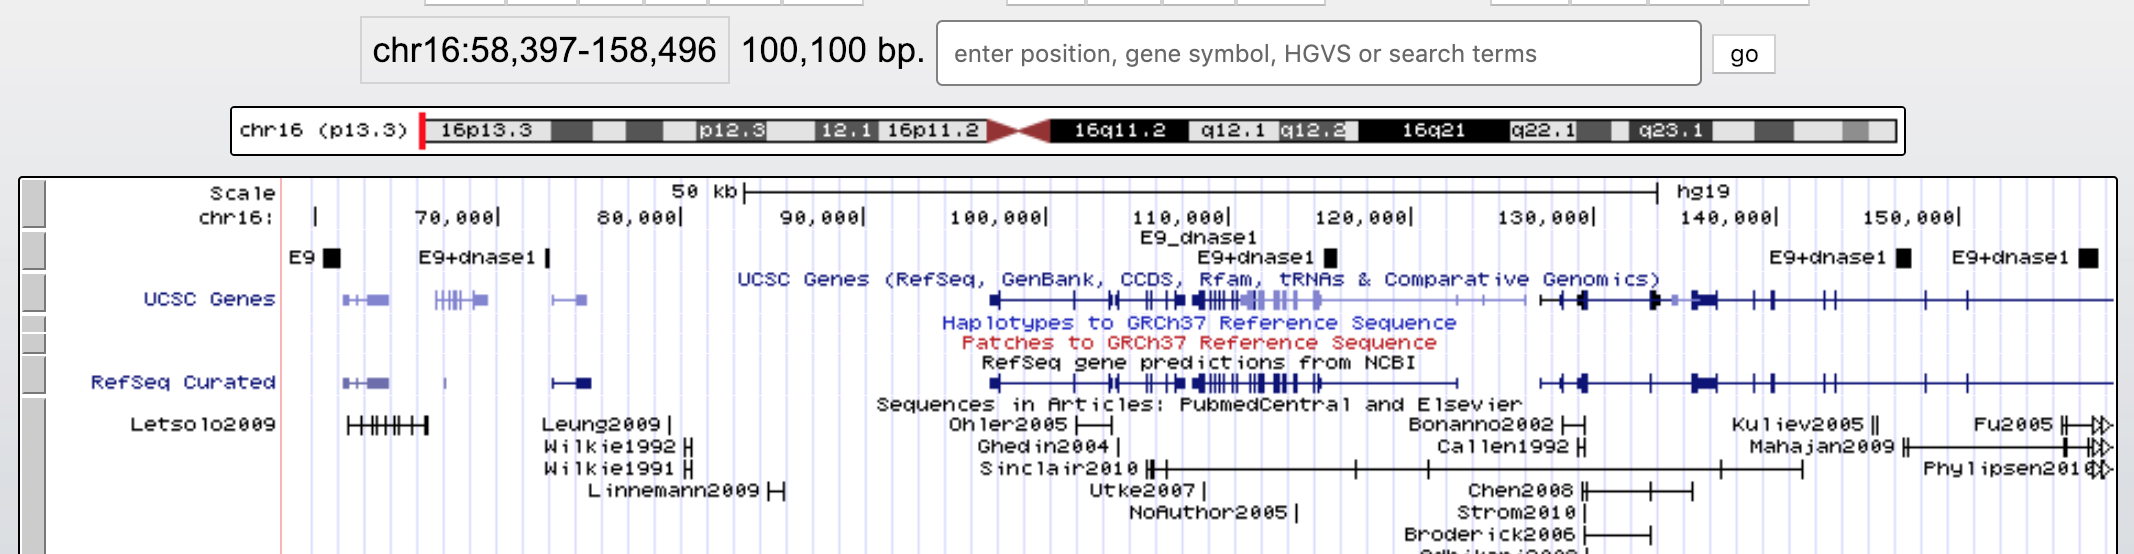

In [421]:
OUTPUT_FEATURE = "dnase1"

intersect_bed(PATH, STATE + ".bed", "wgEncodeOpenChromDnaseMonocd14Pk.narrowPeak.bed", 
                  PATH, STATE + "_dnase1.bed", chrom = CHROM, 
                  f1_feature_filter = STATE, f2_feature_filter="", 
                  output_feature = OUTPUT_FEATURE, sep=SEP,
                  drop_feature_threshold = 10, output_mode="annotate")
head(PATH, STATE + "_dnase1.bed", 10)

overlap_segment_count = bed_segment_count_by_re_feature(PATH, STATE + "_dnase1.bed", 
                                                        OUTPUT_FEATURE)
print("")
print("Count of state segments overlapped:", overlap_segment_count)
total_segment_count = bed_segment_count_by_re_feature(PATH, STATE + "_dnase1.bed", "")
print("Count of all state segments", total_segment_count)
print("Percent overlapped state segments over total segments:", 
      overlap_segment_count * 100 / total_segment_count)
print("Output file:", STATE + "_dnase1.bed")
Image("genome_browser.png")

#### Automated verifications

In [418]:
segment_count_annotate = bed_segment_count_by_re_feature(PATH, STATE + "_dnase1.bed", "")
segment_count = bed_segment_count_by_re_feature(PATH, STATE + ".bed", "")
assert segment_count_annotate == segment_count,\
        "Count of annotated segments not equal to count of original segments"

#### Visual inspection

In [419]:
%%bash
export TRACKS=files/tracks/
echo "Counts"
wc -l ${TRACKS}E9_dnase1.bed
wc -l ${TRACKS}E9.bed
tail ${TRACKS}E9_dnase1.bed
echo
tail ${TRACKS}E9.bed
echo
head ${TRACKS}E9_dnase1.bed
echo
head ${TRACKS}E9.bed
echo
echo "Counts of annotations:"
cat ${TRACKS}E9_dnase1.bed | grep "dnase1" | wc -l
cat ${TRACKS}E9.bed | grep "" | wc -l

Counts
     468 files/tracks/E9_dnase1.bed
     468 files/tracks/E9.bed
chr16	89233600	89234800	E9+dnase1
chr16	89527000	89527400	E9
chr16	89623800	89624200	E9+dnase1
chr16	89707800	89708000	E9+dnase1
chr16	89772400	89772600	E9+dnase1
chr16	89927000	89927800	E9+dnase1
chr16	89976600	89977000	E9+dnase1
chr16	90092400	90092800	E9+dnase1
chr16	90182400	90183000	E9
chr16	90281600	90282000	E9

chr16	89233600	89234800	E9
chr16	89527000	89527400	E9
chr16	89623800	89624200	E9
chr16	89707800	89708000	E9
chr16	89772400	89772600	E9
chr16	89927000	89927800	E9
chr16	89976600	89977000	E9
chr16	90092400	90092800	E9
chr16	90182400	90183000	E9
chr16	90281600	90282000	E9

chr16	60400	61400	E9
chr16	72600	72800	E9+dnase1
chr16	115200	116000	E9+dnase1
chr16	146600	147400	E9+dnase1
chr16	156600	157600	E9+dnase1
chr16	167800	168200	E9+dnase1
chr16	412000	412600	E9+dnase1
chr16	441800	442200	E9+dnase1
chr16	537600	538000	E9+dnase1
chr16	597000	597400	E9+dnase1

chr16	60400	61400	E9
chr16	72600	72800	E9
chr16

# Outputs

In [422]:
%%bash
jupyter nbconvert --to=latex --template=~/report.tplx genomic_regulation.ipynb 1> /dev/null
pdflatex -shell-escape genomic_regulation 1> /dev/null
jupyter nbconvert --to html_with_toclenvs genomic_regulation.ipynb 1> /dev/null

[NbConvertApp] Converting notebook genomic_regulation.ipynb to latex
[NbConvertApp] Support files will be in genomic_regulation_files/
[NbConvertApp] Making directory genomic_regulation_files
[NbConvertApp] Making directory genomic_regulation_files
[NbConvertApp] Writing 54798 bytes to genomic_regulation.tex
[NbConvertApp] Converting notebook genomic_regulation.ipynb to html_with_toclenvs
[NbConvertApp] Writing 1234774 bytes to genomic_regulation.html
